# Online x Offline

Author:
- Reinaldo Augusto

Status:
- DONE

Goal:
- To compare online stores with the offline ones and see if there is a difference between them.

In [1]:
from util import agg_jsonls
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

%matplotlib inline

## Importing the ReclameAqui dataset

In [2]:
from src.maps import tag_map, relative_date
from src.cleaning import build_df_from_RA, format_GB_to_df
from src.loading import load_dataset

reviewsRA = load_dataset("final_dataset_RA")
df_RA = build_df_from_RA(reviewsRA)
print(f"We have a total of {len(reviewsRA)} reviews!")

We have a total of 51655 reviews!


In [3]:
df_RA['datetime'] = pd.to_datetime(df_RA.datetime)
df_RA['month'] = df_RA['datetime'].dt.strftime('%m/%Y')
df_RA.head()

,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,business_name,city,datetime,days_to_first_contact,...,products_Home Appliances,products_Others,resolution_outcome,review_ID,service_grade,timeCaptured,title,uf,would_buy_again,month
0,NaN,NaN,NaN,NaN,NaN,NaN,Tok&Stok - Loja Online,Embu das Artes,2020-03-26 12:48:00+00:00,NaN,...,NaN,NaN,NaN,102002173,NaN,2020-03-27T12:08:11Z,Paguei e nao recebi,SP,NaN,03/2020
1,1.0,NaN,1.0,NaN,NaN,NaN,Tok&Stok - Loja Online,Cuiabá,2020-03-26 22:09:00+00:00,NaN,...,NaN,NaN,NaN,102028063,NaN,2020-03-27T12:08:11Z,Não entregaram o móvel,MT,NaN,03/2020
2,1.0,NaN,NaN,NaN,NaN,1.0,Tok&Stok - Loja Online,Rio de Janeiro,2020-03-25 16:50:00+00:00,NaN,...,NaN,NaN,NaN,101970443,NaN,2020-03-27T12:08:14Z,Não recebi um dos itens do meu pedido e fui co...,RJ,NaN,03/2020
3,NaN,NaN,NaN,NaN,NaN,NaN,Tok&Stok - Loja Online,Acopiara,2020-03-25 16:52:00+00:00,NaN,...,NaN,NaN,NaN,101970555,NaN,2020-03-27T12:08:14Z,Produto não foi entregue e não resolvem,CE,NaN,03/2020
4,3.0,2.0,NaN,NaN,NaN,1.0,Tok&Stok - Loja Online,Vila Velha,2020-03-25 20:20:00+00:00,NaN,...,NaN,NaN,NaN,101979855,NaN,2020-03-27T12:08:14Z,Não entregaram e produto e não devolvem o valo...,ES,NaN,03/2020


## Finding the online stores

In [8]:
online_st = ['Tok&Stok - Loja Online ','Etna Home Store - Loja Online','Marabraz - Loja Online',
             'MadeiraMadeira','Casas Bahia - Marketplace', 'Casas Bahia - Loja Online','Ponto Frio - Loja Online']
df_RA.loc[df_RA['business_name'].isin(online_st),'online'] = 1
df_RA.loc[~df_RA['business_name'].isin(online_st),'online'] = 0

## Exploratory Data Analysis

### Days to first contact comparison

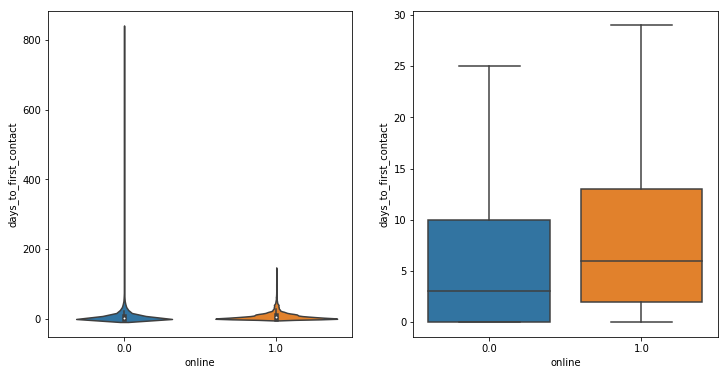

In [14]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
sns.violinplot(x=df_RA['online'],y=df_RA['days_to_first_contact'])

ax2 = plt.subplot(1,2,2)
sns.boxplot(x=df_RA['online'],y=df_RA['days_to_first_contact'],showfliers=False);

In [25]:
from scipy.stats import ttest_ind
data1 = df_RA[df_RA['online']==1]['days_to_first_contact']
data2 = df_RA[df_RA['online']==0]['days_to_first_contact']
stat, p = ttest_ind(data1, data2,nan_policy='omit')
print(p)

0.0017488355900439894


In [33]:
from scipy.stats import mannwhitneyu
data1 = df_RA[df_RA['online']==1]['days_to_first_contact']
data2 = df_RA[df_RA['online']==0]['days_to_first_contact']
stat, p = kruskal(data1, data2,nan_policy='omit')
print(p)

9.107080951973269e-214


### Days to resolution comparison

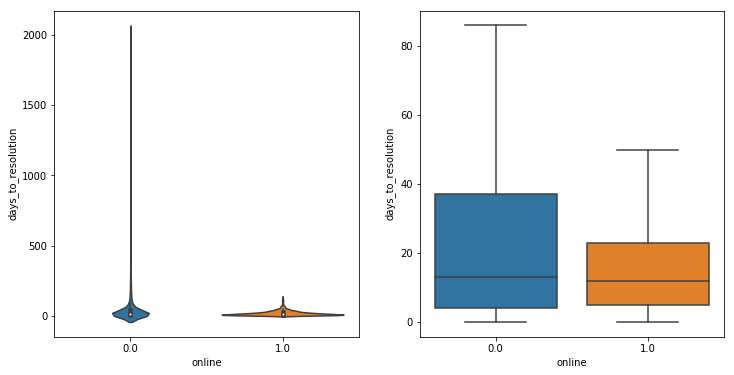

In [80]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
sns.violinplot(x=df_RA['online'],y=df_RA['days_to_resolution'])

ax2 = plt.subplot(1,2,2)
sns.boxplot(x=df_RA['online'],y=df_RA['days_to_resolution'],showfliers=False);

In [34]:
from scipy.stats import ttest_ind
data1 = df_RA[df_RA['online']==1]['days_to_resolution']
data2 = df_RA[df_RA['online']==0]['days_to_resolution']
stat, p = ttest_ind(data1, data2,nan_policy='omit')
print(p)

7.240921370065666e-45


In [32]:
from scipy.stats import mannwhitneyu,kruskal
data1 = df_RA[df_RA['online']==1]['days_to_resolution']
data2 = df_RA[df_RA['online']==0]['days_to_resolution']
stat, p = kruskal(data1, data2,nan_policy='omit')
print(p)

1.2082568613139403e-06


### Comparison between the resolution outcomes of the stores

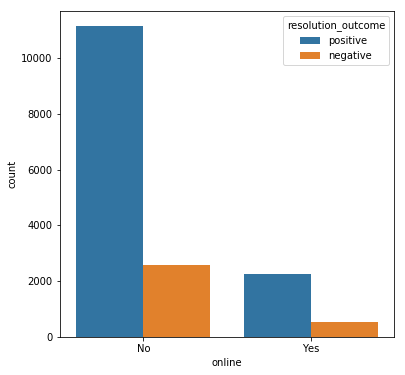

In [92]:
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)
sns.countplot(x=df_RA['online'],hue=df_RA['resolution_outcome'])
ax1.set_xticklabels(['No', 'Yes']);

### Issues in online xoffline stores

In [54]:
issues = [col for col in df_RA.columns if "issue" in col]
issues.append('timeCaptured')
online_issues = df_RA.groupby("online").count()[issues].reset_index()

In [77]:
online_issues_perc = online_issues.copy()
for i in issues:
    online_issues_perc[i] = online_issues_perc[i]/online_issues_perc['timeCaptured']

In [78]:
online_issues

,online,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,product_issues,product_issues_Damaged,product_issues_Electrical problems,product_issues_Missing pieces,product_issues_Quality,timeCaptured
0,0.0,13329,3442,7528,1385,321,1724,5047,1358,195,212,3282,34893
1,1.0,7702,715,5213,118,72,1662,1104,326,38,114,626,16762


In [79]:
online_issues_perc

,online,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,product_issues,product_issues_Damaged,product_issues_Electrical problems,product_issues_Missing pieces,product_issues_Quality,timeCaptured
0,0.0,0.381996,0.098644,0.215745,0.039693,0.009200,0.049408,0.144642,0.038919,0.005589,0.006076,0.094059,1.0
1,1.0,0.459492,0.042656,0.311001,0.007040,0.004295,0.099153,0.065863,0.019449,0.002267,0.006801,0.037346,1.0


### Service grade per type of store

In [57]:
pd.crosstab(df_RA['online'], df_RA['service_grade'], margins=True, normalize='index').apply(lambda r: round(r*100,0), axis=1)

service_grade,3.0,4.0,7.0,8.0
online,,,,
0.0,13.0,11.0,30.0,46.0
1.0,14.0,10.0,32.0,44.0
All,13.0,11.0,31.0,45.0


### Tag evolution in online vs offline stores

In [68]:
def online_tag_micro(online=1,issue=''):
    if(online == 1):
        typ = 'Online'
    else:
        typ = 'Offline'
    
    agg = df_RA.groupby(['online','month']).agg({'datetime':'max', issue: ['sum', 'count']}) 

    date_df = df_RA.groupby(['month']).agg({'datetime':'max', issue: ['sum', 'count']})

    df_agg = pd.DataFrame(agg.to_records())
    df_agg.columns = ['online','date','datetime',issue, issue+'_count']
    
    date_df = pd.DataFrame(date_df.to_records())
    date_df.columns = ['date','datetime',issue, issue+'_count']
    
    mean_qtd = len(df_agg['online'].unique()) 

    date_df[issue+'_mean']=date_df[issue]/mean_qtd
    
    if(issue!=''):
        date_min = min(df_agg[df_agg['online']==online]['datetime'])
        fig, ax = plt.subplots(figsize=(6,6))
        plt.plot('date', issue,data=df_agg[(df_agg['business_name']==online)&(df_agg['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
        ax.plot('date', issue+'_mean',data=date_df[(date_df['datetime']>=date_min)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
        plt.title(issue+' - '+typ)
        plt.legend([typ, 'Sector Average'])
        plt.xticks(rotation=90)

In [69]:
def online_tag_macro(online=1,macro_issue=''):
    if(online == 1):
        typ = 'Online'
    else:
        typ = 'Offline'
    
    agg = df_RA.groupby(['online','month']).agg({'business_issues':['sum', 'count'],
                                                      'product_issues':['sum', 'count'],
                                                      'datetime':'max'}) 

    date_df = df_RA.groupby(['month']).agg({'business_issues':['sum', 'count'],'product_issues':['sum', 'count'],
                                         'datetime':'max'})
        
    df_agg = pd.DataFrame(agg.to_records())
    df_agg.columns = ['online','date','business_issues', 'business_issues_count',
                      'product_issues', 'product_issues_count','datetime']
    df_agg['Total']=df_agg['business_issues']+df_agg['product_issues']
    
    date_df = pd.DataFrame(date_df.to_records())
    date_df.columns = ['date','business_issues', 'business_issues_count','product_issues', 
                       'product_issues_count','datetime']
    date_df['Total']=date_df['business_issues']+date_df['product_issues']
    
    mean_qtd = len(df_agg['online'].unique()) 
    date_df['product_issues_mean']=date_df['product_issues']/mean_qtd
    date_df['business_issues_mean']=date_df['business_issues']/mean_qtd
    date_df['Total_mean']=date_df['Total']/mean_qtd
    
    if(macro_issue==''):
        date_min = min(df_agg[df_agg['online']==online]['datetime'])
        fig, ax = plt.subplots(figsize=(6,6))
        plt.plot('date', 'Total',data=df_agg[(df_agg['online']==online)&(df_agg['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
        ax.plot('date', 'Total_mean',data=date_df[(date_df['datetime']>=date_min)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
        plt.title('Total Problems - '+typ)
        plt.legend([typ, 'Sector Average'])
        plt.xticks(rotation=90)
    else:
        date_min = min(df_agg[df_agg['online']==online]['datetime'])
        fig, ax = plt.subplots(figsize=(6,6))
        plt.plot('date', macro_issue,data=df_agg[(df_agg['online']==online)&(df_agg['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
        ax.plot('date', macro_issue+'_mean',data=date_df[(date_df['datetime']>=date_min)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
        plt.title(macro_issue+' - '+typ)
        plt.legend([typ, 'Sector Average'])
        plt.xticks(rotation=90)


In [70]:
def online_tag(online=1,macro_issue='',issue=''):
    if(issue==''):
        online_tag_macro(online, macro_issue)
    else:
        online_tag_micro(online, issue)

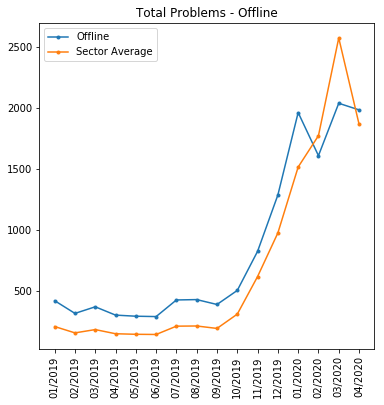

In [72]:
online_tag(0)